In [51]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
path =r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\finaldata\finaldata_gw.csv"
data = pd.read_csv(path,sep="\t")
data

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
0,294100,20930,60742,157344,3038,12492,1401,5368,921,34.99,...,1,1.0,1.0,1.0,3.0,134967.0,0.0,2018-10-17,1675,Overwhelmingly Positive
1,960090,13428,53891,246979,6441,4018,277,1532,62,13.99,...,0,1.0,1.0,0.0,2.0,222889.0,146.0,2018-12-18,1613,Overwhelmingly Positive
2,504230,1234,4148,71428,1686,1316,310,370,582,19.99,...,1,1.0,1.0,1.0,3.0,66397.0,32.0,2018-01-25,1940,Overwhelmingly Positive
3,588650,4553,14880,128085,3722,1841,183,868,213,14.99,...,1,1.0,1.0,1.0,3.0,113184.0,121.0,2018-08-06,1747,Overwhelmingly Positive
4,264710,4205,50876,221972,7800,1943,313,941,277,29.99,...,1,1.0,1.0,0.0,2.0,208334.0,17.0,2018-01-24,1941,Overwhelmingly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,0,0,14.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-12-02,168,Negative
46248,2098860,0,0,0,11,0,0,0,0,9.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-08-09,283,Negative
46249,2154770,814,1176,0,0,0,0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-01,169,Very Negative
46250,1915410,0,1,0,16,0,0,0,0,2.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-04-26,388,Negative


In [53]:
data["months_after_release"] = data["days_after_release"]//30

In [54]:
data["months_after_release"].min()

4

In [55]:
data

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review,months_after_release
0,294100,20930,60742,157344,3038,12492,1401,5368,921,34.99,...,1.0,1.0,1.0,3.0,134967.0,0.0,2018-10-17,1675,Overwhelmingly Positive,55
1,960090,13428,53891,246979,6441,4018,277,1532,62,13.99,...,1.0,1.0,0.0,2.0,222889.0,146.0,2018-12-18,1613,Overwhelmingly Positive,53
2,504230,1234,4148,71428,1686,1316,310,370,582,19.99,...,1.0,1.0,1.0,3.0,66397.0,32.0,2018-01-25,1940,Overwhelmingly Positive,64
3,588650,4553,14880,128085,3722,1841,183,868,213,14.99,...,1.0,1.0,1.0,3.0,113184.0,121.0,2018-08-06,1747,Overwhelmingly Positive,58
4,264710,4205,50876,221972,7800,1943,313,941,277,29.99,...,1.0,1.0,0.0,2.0,208334.0,17.0,2018-01-24,1941,Overwhelmingly Positive,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,0,0,14.99,...,1.0,0.0,0.0,1.0,0.0,0.0,2022-12-02,168,Negative,5
46248,2098860,0,0,0,11,0,0,0,0,9.99,...,1.0,0.0,0.0,1.0,0.0,0.0,2022-08-09,283,Negative,9
46249,2154770,814,1176,0,0,0,0,0,0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-01,169,Very Negative,5
46250,1915410,0,1,0,16,0,0,0,0,2.99,...,1.0,0.0,0.0,1.0,0.0,0.0,2022-04-26,388,Negative,12


In [56]:
data.drop(columns=["metacritic","recommendations","positive","negative","new_date"],inplace=True)
data["Review"] = data["Review"].apply(lambda x : 'Positive' if 'Positive' in x else "Negative")

In [57]:
data

,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,dlc,metacritic_tf,windows,mac,linux,platforms_num,achievements,days_after_release,Review,months_after_release
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,6.0,1,1.0,1.0,1.0,3.0,0.0,1675,Positive,55
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,1.0,0,1.0,1.0,0.0,2.0,146.0,1613,Positive,53
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,1.0,1,1.0,1.0,1.0,3.0,32.0,1940,Positive,64
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,7.0,1,1.0,1.0,1.0,3.0,121.0,1747,Positive,58
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,1.0,1,1.0,1.0,0.0,2.0,17.0,1941,Positive,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,1.0,0,1.0,0.0,0.0,1.0,0.0,168,Negative,5
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,0.0,0,1.0,0.0,0.0,1.0,0.0,283,Negative,9
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0.0,0,0.0,0.0,0.0,0.0,0.0,169,Negative,5
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,0.0,0,1.0,0.0,0.0,1.0,0.0,388,Negative,12


In [58]:
genr = data["genre"]
gs = genr.values
gs = gs.tolist()

for i in range(len(gs)):
    gs[i] = gs[i].split(",")
    for j in range(len(gs[i])):
        if " " in gs[i][j]:
            gs[i][j]=gs[i][j].replace(" ","")
    gs[i] = ",".join(gs[i])

In [59]:
# 모든 장르 원핫 
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer()
x = vectorize.fit_transform(gs)
new_df = pd.DataFrame(x.toarray(), columns=vectorize.get_feature_names())
new_df

,360v,accounting,action,actiongames,adventure,animation,audioproduction,casual,design,documentary,...,short,simulation,softwaretraining,sports,strategy,tutorial,utilities,videoproduction,violent,webpublishing
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46248,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46250,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
data = pd.concat([data,new_df],axis=1)

In [61]:

# 장르 처리 (클러스터링)

from sklearn.cluster import KMeans
from gensim.models import FastText
import nltk
nltk.download()

genr = data["genre"]
gs = genr.values
gs = gs.tolist()
gs = list(set(gs))

for i in range(len(gs)):
    gs[i] = gs[i].split(",")
    for j in range(len(gs[i])):
        if " " in gs[i][j]:
            gs[i][j]=gs[i][j].replace(" ","")
    gs[i] = ",".join(gs[i])

print(gs)
normalized_text = []
for string in gs:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
genr = [word_tokenize(sentence) for sentence in normalized_text]

model = FastText(genr,min_count=1,workers=4, sg=1)
model.build_vocab(corpus_iterable=genr)
model.train(corpus_iterable=genr, total_examples=len(genr), epochs=10)

word_vectors = model.wv.vectors # 어휘의 feature vector
print(word_vectors.shape)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['Action,Adventure,Casual,Indie,RPG,Sports,Strategy', 'Indie,Simulation,Strategy', 'Action,Casual,FreetoPlay,Indie,MassivelyMultiplayer,RPG,Simulation,Strategy,EarlyAccess', 'Simulation', 'Indie,EarlyAccess', 'SexualContent,Nudity,Casual,Indie,Simulation', 'MassivelyMultiplayer,EarlyAccess', 'Casual,FreetoPlay,MassivelyMultiplayer,Strategy,EarlyAccess', 'FreetoPlay,Indie,MassivelyMultiplayer,Racing,RPG,Simulation,Sports', 'Action,Indie,MassivelyMultiplayer,Simulation,Sports,EarlyAccess', 'Adventure,Indie,RPG,EarlyAccess', 'Action,Adventure,Casual,Indie,Sports,EarlyAccess', 'Action,Adventure,FreetoPlay,RPG,EarlyAccess', 'Adventure,Casual,Sports', 'FreetoPlay,Indie,MassivelyMultiplayer,RPG,Simulation,Strategy,EarlyAccess', 'Adventure,Racing,Simulation', 'Action,Casual,Indie,EarlyAccess', 'Adventure,Casual,FreetoPlay,Indie,Simulation,Strategy,EarlyAccess', 'Casual,Indie,MassivelyMultiplayer,RPG,Sports', 'Acti

c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


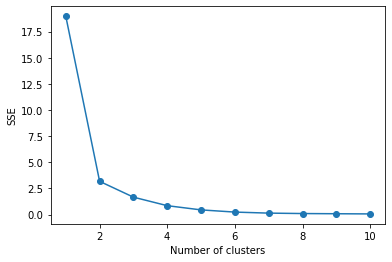

In [62]:
# 엘보우
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    idx = kmeans.fit_predict(word_vectors)
    sse.append(kmeans.inertia_)

# num_clusters = int(word_vectors.shape[0]/4) # 어휘 크기의 1/5나 평균 5단어
# num_clusters = int(num_clusters)
# print(num_clusters)

# kmeans_clustering = KMeans(n_clusters=num_clusters)
# idx = kmeans_clustering.fit_predict(word_vectors)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

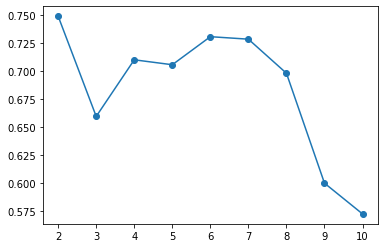

In [63]:
# 실루엣
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    idx = kmeans.fit_predict(word_vectors)
    score = silhouette_score(word_vectors, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(range(2, 11), silhouette_scores, marker='o')

In [64]:

num_clusters = 6
kmeans = KMeans(n_clusters=6, random_state=0)
idx = kmeans.fit_predict(word_vectors)

idx = list(idx)
names = model.wv.index_to_key
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [65]:
clt = {}
for c in range(num_clusters):
    # 클러스터 번호를 출력
    # print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])    
    clt["cluster"+str(c)] = words     

In [66]:
genr = data["genre"]
gs = genr.values
gs = gs.tolist()

for i in range(len(gs)):
    gs[i] = gs[i].split(",")
    for j in range(len(gs[i])):
        if " " in gs[i][j]:
            gs[i][j]=gs[i][j].replace(" ","")
    gs[i] = ",".join(gs[i])


normalized_text = []
for string in gs:
    tokens = re.sub(r"[^a-z0-9 ]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
genr = [word_tokenize(sentence) for sentence in normalized_text]
genr

[['indie', 'simulation', 'strategy'],
 ['strategy'],
 ['action', 'adventure', 'indie'],
 ['action', 'adventure', 'indie'],
 ['adventure', 'indie'],
 ['action', 'indie'],
 ['action', 'indie'],
 ['adventure', 'indie'],
 ['adventure', 'rpg', 'strategy'],
 ['action', 'adventure', 'indie', 'rpg', 'simulation', 'earlyaccess'],
 ['casual', 'indie'],
 ['adventure', 'indie', 'rpg'],
 ['action', 'adventure', 'indie', 'simulation'],
 ['adventure', 'indie'],
 ['adventure', 'freetoplay', 'indie'],
 ['adventure', 'casual', 'indie', 'rpg'],
 ['action', 'freetoplay', 'indie'],
 ['action', 'adventure', 'rpg'],
 ['casual', 'indie'],
 ['adventure', 'casual', 'simulation'],
 ['action', 'indie', 'rpg', 'simulation', 'strategy'],
 ['adventure', 'indie'],
 ['casual', 'indie'],
 ['action', 'indie', 'sports'],
 ['casual'],
 ['indie', 'rpg'],
 ['casual', 'freetoplay', 'indie'],
 ['adventure'],
 ['adventure'],
 ['action', 'indie'],
 ['adventure'],
 ['action',
  'adventure',
  'casual',
  'freetoplay',
  'indie',

In [67]:
cont = []
for i in range(len(data)):
    # genr = set(data.loc[i,"genre"].split(", "))
    tmp = []
    for k,v in clt.items():
        tmp.append(len(set(v).intersection(set(genr[i]))))
    cont.append(tmp)


In [68]:
# tmp = pd.DataFrame(data = cont, columns=["c0","c1","c2","c3","c4","c5","c6","c7","c8"])
tmp = pd.DataFrame(data = cont, columns=["c0","c1","c2","c3","c4","c5"])
# tmp = pd.DataFrame(data = cont, columns=["c0","c1","c2","c3"])

In [69]:
data

,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,short,simulation,softwaretraining,sports,strategy,tutorial,utilities,videoproduction,violent,webpublishing
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,0,1,0,0,1,0,0,0,0,0
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,0,0,0,0,1,0,0,0,0,0
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,0,0,0,0,0,0,0,0,0,0
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0,0,0,0,0,0,0,0,0,0
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,0,0,0,0,0,0,0,0,0,0


In [70]:
data = pd.concat([data,tmp],axis=1)

In [ ]:
data.to_csv(r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\modeling\clstandoh\clusterandoh2.csv",sep=";")